# House Prices Prediction (Regression)
**Objective:** Predict the sale price of houses based on various features such as location, size, and quality.  
**Dataset Source:** Kaggle House Prices Dataset  
**Problem Type:** Regression  
**Target Variable:** `SalePrice`


### Column Explanations

*   **Id**: Unique identifier for each house.
*   **MSSubClass**: The type of dwelling involved in the sale.
*   **MSZoning**: Identifies the general zoning classification of the sale.
*   **LotFrontage**: Linear feet of street connected to property.
*   **LotArea**: Lot size in square feet.
*   **OverallQual**: Rates the overall material and finish of the house.
*   **OverallCond**: Rates the overall condition of the house.
*   **YearBuilt**: Original construction date.
*   **YearRemodAdd**: Remodel date (same as construction date if no remodel or additions).
*   **ExterQual**: Evaluates the quality of the exterior material.
*   **BsmtQual**: Evaluates the height of the basement.
*   **TotalBsmtSF**: Total square feet of basement area.
*   **1stFlrSF**: First Floor square feet.
*   **GrLivArea**: Above grade (ground) living area square feet.
*   **FullBath**: Full bathrooms above grade.
*   **BedroomAbvGr**: Bedrooms above grade (does NOT include basement bedrooms).
*   **KitchenAbvGr**: Kitchens above grade.
*   **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms).
*   **Fireplaces**: Number of fireplaces.
*   **GarageCars**: Size of garage in car capacity.
*   **GarageArea**: Size of garage in square feet.
*   **PoolArea**: Pool area in square feet.
*   **MoSold**: Month Sold (MM).
*   **YrSold**: Year Sold (YYYY).
*   **SalePrice**: The property's sale price in dollars. This is the target variable for prediction.

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# l0ad datsaset
import zipfile
import os
import pandas as pd

zip_path = '/content/house-prices-advanced-regression-techniques.zip'

# Create output directory if it doesn't exist
os.makedirs('/content/house_prices_data', exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/house_prices_data')

# Load the 'train.csv' file into a pandas DataFrame directly after unzipping
df = pd.read_csv(os.path.join('/content/house_prices_data', 'train.csv'))
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Initial Observations:**  
- Dataset contains 1460 rows and 81 columns  
- Target variable is `SalePrice` (continuous)  
- Some columns contain missing values or irrelevant data


In [ ]:
# Basic info
df.info()

# Statistical summary
df.describe()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
df.isnull().sum().sum()

np.int64(7829)

**EDA Observations:**  
- Columns like `Alley` and `PoolQC` have many missing values → consider dropping  
- Features like `GrLivArea`, `OverallQual`, `YearBuilt` likely correlate with `SalePrice`  
- Some numerical features have outliers (e.g., `GrLivArea` extreme values)


In [ ]:
# Drop columns with too many missing values
df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

# Fill missing numerical features with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical features with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical variables
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


/tmp/ipython-input-1569583886.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-1569583886.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

**Cleaning Decisions:**  
- Dropped columns with too many missing values  
- Filled numerical features with median  
- Filled categorical features with mode  
- Encoded all categorical variables for ML models


In [ ]:
# Create new features
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']


**Feature Engineering:**  
- `TotalSF` combines basement and floor areas to represent total living space  
- `HouseAge` represents the age of the house at sale time  
- These features are expected to improve model predictions


In [ ]:
# Separate features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)


In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)


**Model Selection:**  
- Linear Regression as a baseline  
- Random Forest Regressor for better handling of non-linear relationships and feature interactions  
- Random Forest expected to perform better on this dataset


In [ ]:
# Linear Regression Evaluation
print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))

# Random Forest Evaluation
print("Random Forest Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))


Linear Regression Metrics:
MAE: 21494.768334528086
RMSE: 34330.18639604207
R2: 0.846347904097915
Random Forest Metrics:
MAE: 17894.271643835615
RMSE: 29704.634592992814
R2: 0.8849637821822434


**Evaluation Observations:**  
- Random Forest performed better than Linear Regression  
- RMSE and R² indicate strong predictive performance  
- Feature importance can highlight key drivers of house prices


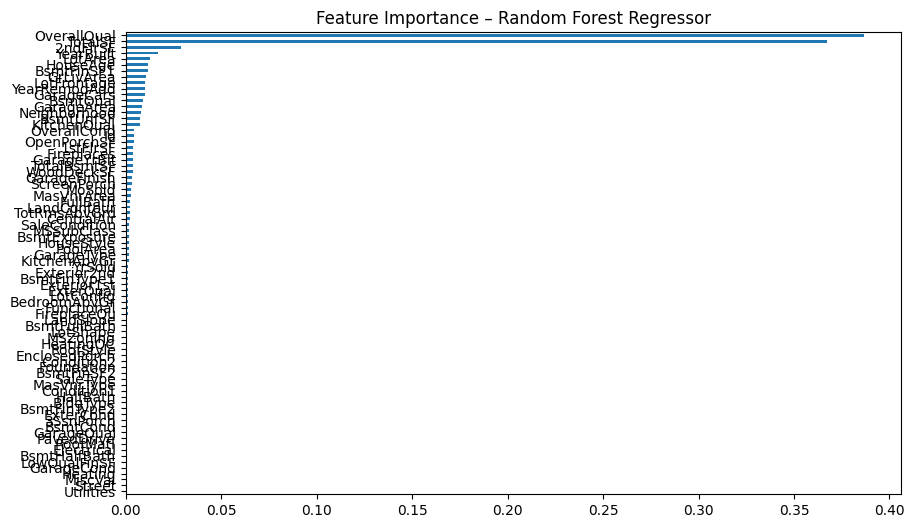

In [ ]:
# Feature importance for Random Forest
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance – Random Forest Regressor")
plt.show()


**Key Insights:**  
- `OverallQual`, `GrLivArea`, and `TotalSF` are top features affecting house prices  
- New feature `HouseAge` has moderate influence  
- Helps understand which aspects of houses drive price in real estate


# Conclusion
- Successfully built regression models to predict house prices  
- Data cleaning, feature engineering, and model selection improved performance  
- Random Forest Regressor outperformed Linear Regression with lower RMSE and higher R²  
